# Assignment 3: Data Visualisation

### 1. Create a plot with the help of Basemap, on which you plot sales records for 2015 which are not farther away than 50km from Copenhagen city center (lat: 55.676111, lon: 12.568333)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import json, csv
import folium
#from mpl_toolkits.basemap import Basemap
import math

In [3]:
df = pd.read_csv("../finallist.csv", index_col=False)
#copenhagen = pd.read_csv("cph1992.csv")
#odense = pd.read_csv("odense1992.csv")
#aalborg = pd.read_csv("aalborg1992.csv")
#aarhus = pd.read_csv("aarhus1992.csv")

In [4]:
df.head()

,Unnamed: 0,address,zip_code,price,sell_date,sell_type,price_per_sqm,no_rooms,housing_type,size_in_sqm,year_of_construction,price_change_in_pct,latitude,longitude
0,0,"Ved Volden 5, 5. TV",1425 København K,4000000,23-05-2017,Alm. Salg,43956.0,3.0,Lejlighed,91.0,1938.0,0.0,55.671769,12.593629
1,1,"Rådhusstræde 4C, 1",1466 København K,4895000,18-05-2017,Alm. Salg,46619.0,3.0,Lejlighed,105.0,1796.0,0.0,55.676839,12.573689
2,2,"Store Kongensgade 112A, 3",1264 København K,250000,15-05-2017,Andet,1851.0,2.0,Lejlighed,135.0,1860.0,0.0,55.687079,12.590441
3,3,"Amaliegade 13G, 2",1256 København K,7375000,15-05-2017,Alm. Salg,75255.0,3.0,Lejlighed,98.0,1948.0,9.0,55.683439,12.591287
4,4,"Borgergade 144, 3. TH",1300 København K,5825000,10-05-2017,Alm. Salg,57673.0,3.0,Lejlighed,101.0,1854.0,3.0,55.687623,12.588744


In [5]:
len(df)

1385309

In [6]:
#missing values
df.isnull().sum()

Unnamed: 0                   0
address                      0
zip_code                     0
price                        0
sell_date                    0
sell_type                    0
price_per_sqm            82393
no_rooms                   303
housing_type                 0
size_in_sqm                493
year_of_construction       264
price_change_in_pct          1
latitude                269940
longitude               269940
dtype: int64

In [7]:
# latitude, longitude contains 269940 rows with NAN and price_per_sqm contains 82393 row
# Those can be inspected specific by following commands.
df[df.latitude.isnull()]
df[df.longitude.isnull()]
df[df.price_per_sqm.isnull()]

,Unnamed: 0,address,zip_code,price,sell_date,sell_type,price_per_sqm,no_rooms,housing_type,size_in_sqm,year_of_construction,price_change_in_pct,latitude,longitude
233,233,Amaliegade 9 B st,1256 København K,14850000,04-01-2017,Alm. Salg,NaN,NaN,"Ejerlejl., forretning",NaN,NaN,0.0,NaN,NaN
1254,1254,"Åbenrå 16, 3. TV",1124 København K,7970000,12-08-2015,Alm. Salg,NaN,4.0,Lejlighed,154.0,1900.0,0.0,NaN,NaN
1255,1255,"Åbenrå 16, ST. TV",1124 København K,5070000,12-08-2015,Alm. Salg,NaN,3.0,Lejlighed,117.0,1900.0,0.0,NaN,NaN
1312,1312,"Åbenrå 16, 2. TH",1124 København K,5700000,17-07-2015,Alm. Salg,NaN,3.0,Lejlighed,116.0,1900.0,0.0,NaN,NaN
1508,1508,"Åbenrå 16, 4. TH",1124 København K,5785000,11-05-2015,Alm. Salg,NaN,3.0,Lejlighed,105.0,1900.0,0.0,NaN,NaN
1663,1663,"Åbenrå 16, 1. TH",1124 København K,5600000,26-03-2015,Alm. Salg,NaN,3.0,Lejlighed,116.0,1900.0,0.0,NaN,NaN
1756,1756,"Åbenrå 16, 3. TH",1124 København K,5900000,05-03-2015,Alm. Salg,NaN,3.0,Lejlighed,116.0,1900.0,0.0,NaN,NaN
1770,1770,"Amaliegade 21A, ST. 1",1256 København K,32000000,02-03-2015,Alm. Salg,NaN,1.0,Fritid,NaN,1751.0,0.0,55.685257,12.593459
2268,2268,Amaliegade 9 kl,1256 København K,600000,28-05-2014,Alm. Salg,NaN,NaN,"Ejerlejl., forretning",NaN,NaN,0.0,NaN,NaN
2299,2299,Strandgade 10D,1401 København K,1250000,10-05-2014,Alm. Salg,NaN,3.0,Fritid,NaN,1720.0,0.0,55.673122,12.588586


In [8]:
# dropping all rows containin null values
df = df.dropna(how='any')
df.shape

(1038644, 14)

In [9]:
#Creating a new column with only zipcode. The original zip code also did contain city name
df['zip_nr'] = [int(el.split(' ')[0]) for el in df['zip_code'].values]

In [10]:
df.head()

,Unnamed: 0,address,zip_code,price,sell_date,sell_type,price_per_sqm,no_rooms,housing_type,size_in_sqm,year_of_construction,price_change_in_pct,latitude,longitude,zip_nr
0,0,"Ved Volden 5, 5. TV",1425 København K,4000000,23-05-2017,Alm. Salg,43956.0,3.0,Lejlighed,91.0,1938.0,0.0,55.671769,12.593629,1425
1,1,"Rådhusstræde 4C, 1",1466 København K,4895000,18-05-2017,Alm. Salg,46619.0,3.0,Lejlighed,105.0,1796.0,0.0,55.676839,12.573689,1466
2,2,"Store Kongensgade 112A, 3",1264 København K,250000,15-05-2017,Andet,1851.0,2.0,Lejlighed,135.0,1860.0,0.0,55.687079,12.590441,1264
3,3,"Amaliegade 13G, 2",1256 København K,7375000,15-05-2017,Alm. Salg,75255.0,3.0,Lejlighed,98.0,1948.0,9.0,55.683439,12.591287,1256
4,4,"Borgergade 144, 3. TH",1300 København K,5825000,10-05-2017,Alm. Salg,57673.0,3.0,Lejlighed,101.0,1854.0,3.0,55.687623,12.588744,1300


In [11]:
# Formatting the date with to_datetime method
newdate = pd.to_datetime(df['sell_date'])

In [12]:
# making a new column named sell_Date
df['sell_date'] = newdate

In [13]:
# the new column sell_year now only contains the year by executing the following command
df['sell_year'] = df['sell_date'].dt.year

In [14]:
df.head()

,Unnamed: 0,address,zip_code,price,sell_date,sell_type,price_per_sqm,no_rooms,housing_type,size_in_sqm,year_of_construction,price_change_in_pct,latitude,longitude,zip_nr,sell_year
0,0,"Ved Volden 5, 5. TV",1425 København K,4000000,2017-05-23,Alm. Salg,43956.0,3.0,Lejlighed,91.0,1938.0,0.0,55.671769,12.593629,1425,2017
1,1,"Rådhusstræde 4C, 1",1466 København K,4895000,2017-05-18,Alm. Salg,46619.0,3.0,Lejlighed,105.0,1796.0,0.0,55.676839,12.573689,1466,2017
2,2,"Store Kongensgade 112A, 3",1264 København K,250000,2017-05-15,Andet,1851.0,2.0,Lejlighed,135.0,1860.0,0.0,55.687079,12.590441,1264,2017
3,3,"Amaliegade 13G, 2",1256 København K,7375000,2017-05-15,Alm. Salg,75255.0,3.0,Lejlighed,98.0,1948.0,9.0,55.683439,12.591287,1256,2017
4,4,"Borgergade 144, 3. TH",1300 København K,5825000,2017-10-05,Alm. Salg,57673.0,3.0,Lejlighed,101.0,1854.0,3.0,55.687623,12.588744,1300,2017


In [15]:
def haversine_distance(origin, destination):

    lat_orig, lon_orig = origin
    lat_dest, lon_dest = destination
    radius = 6371

    dlat = math.radians(lat_dest-lat_orig)
    dlon = math.radians(lon_dest-lon_orig)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) + math.cos(math.radians(lat_orig)) 
        * math.cos(math.radians(lat_dest)) * math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d


def distance(origin, destination):

    lat_orig, lon_orig = origin
    lat_dest, lon_dest = destination

    dlat = lat_dest - lat_orig
    dlon = lon_dest - lon_orig

    d = math.sqrt(dlat ** 2 + dlon ** 2)

    return d


#### Confirming that the center (latitude and longitude) is in Copenhagen city

<IPython.core.display.Javascript object>


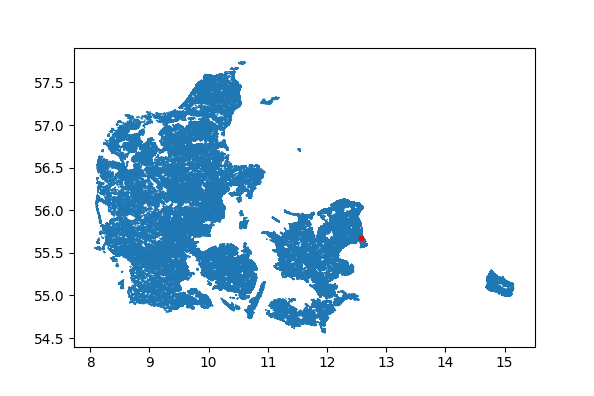

12.568333 55.676111


In [16]:
%matplotlib notebook


x_values = df['longitude']
y_values = df['latitude']

plt.scatter(x_values[:], y_values[:], s=1, edgecolor='none')

center_x = 12.568333
center_y = 55.676111

plt.scatter(center_x, center_y, s=10, c='red')
print(center_x, center_y)
plt.show()

In [17]:
# Distances calculation from both methods. This assignment will only use teh Haversine distance

In [17]:
havdistances = [haversine_distance((center_x, center_y), el) for el in df[['longitude', 'latitude']].values]

In [18]:
distances = [distance((center_x, center_y), el) for el in df[['longitude', 'latitude']].values]

<IPython.core.display.Javascript object>


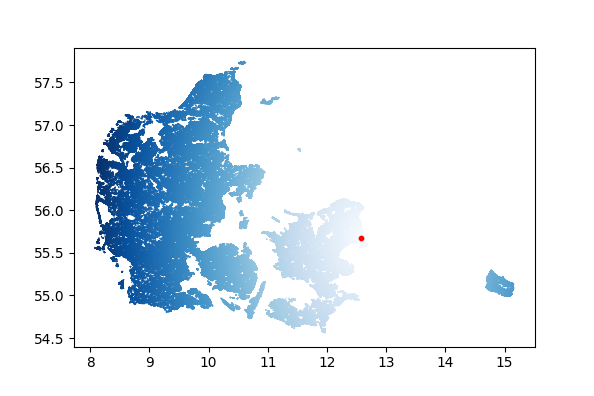

In [19]:
%matplotlib notebook

plt.scatter(x_values[:], y_values[:], s=1, c=havdistances, 
            cmap=plt.cm.Blues, edgecolor='none')
plt.scatter(center_x, center_y, s=10, c='red')
plt.show()

In [20]:
df['dist_from_cph_center'] = havdistances

In [21]:
temp = ((df['dist_from_cph_center'] < 50) & (df['sell_year'] == 2015))
citycenter50km = df[temp]

In [22]:
citycenter50km.head()

,Unnamed: 0,address,zip_code,price,sell_date,sell_type,price_per_sqm,no_rooms,housing_type,size_in_sqm,year_of_construction,price_change_in_pct,latitude,longitude,zip_nr,sell_year,dist_from_cph_center
964,964,"Galionsvej 1F, 2. 29",1437 København K,8500000,2015-12-30,Alm. Salg,60714.0,3.0,Lejlighed,140.0,1952.0,0.0,55.678720,12.606322,1437,2015,4.233662
970,970,"Galionsvej 1, 3. 4",1437 København K,11500000,2015-12-22,Alm. Salg,61497.0,3.0,Lejlighed,187.0,1952.0,-1.0,55.678821,12.606742,1437,2015,4.281000
972,972,"Dronningensgade 3F, 1. TH",1420 København K,5200000,2015-12-21,Alm. Salg,44067.0,3.0,Lejlighed,118.0,1848.0,0.0,55.670363,12.588966,1420,2015,2.377578
973,973,"Snaregade 5, 1. TV",1205 København K,2450000,2015-12-20,Alm. Salg,49000.0,2.0,Lejlighed,50.0,1732.0,-5.0,55.676933,12.576520,1205,2015,0.914714
974,974,"Grønnegade 33, 1",1107 København K,5895000,2015-12-20,Alm. Salg,32750.0,5.0,Lejlighed,180.0,1897.0,-6.0,55.681474,12.583174,1107,2015,1.749876


#### Plotting the latitude and longitude for 2015 within 50 km from CPH city center

<IPython.core.display.Javascript object>


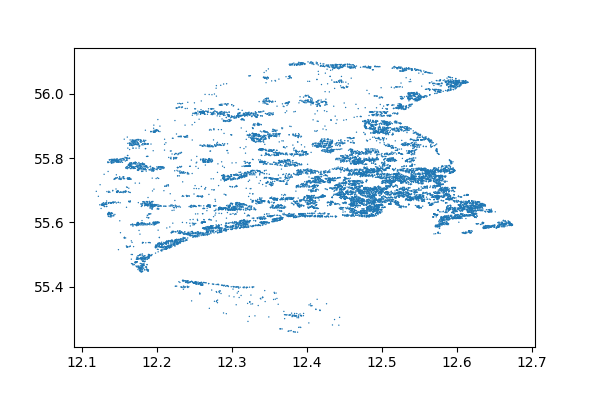

In [23]:
%matplotlib notebook

x = citycenter50km['longitude']
y = citycenter50km['latitude']

plt.scatter(x, y, s=1, edgecolor='none')
plt.show()

#### Plotting the sales records for 2015 in scatter, histogram. We have used price and number of rooms as sales record data

In [24]:
sale = citycenter50km['price']
rooms = citycenter50km['no_rooms']

<IPython.core.display.Javascript object>


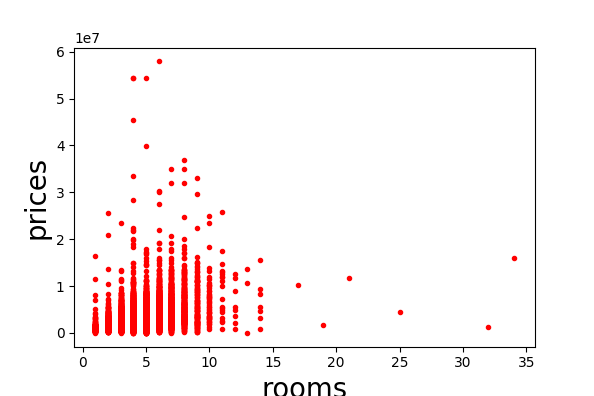

In [25]:
%matplotlib notebook
plt.xlabel('rooms' ,fontsize='20')
plt.ylabel('prices' ,fontsize='20')
plt.scatter( rooms, sale,  color='red', marker='.')
plt.show()

In [26]:
df.head()

,Unnamed: 0,address,zip_code,price,sell_date,sell_type,price_per_sqm,no_rooms,housing_type,size_in_sqm,year_of_construction,price_change_in_pct,latitude,longitude,zip_nr,sell_year,dist_from_cph_center
0,0,"Ved Volden 5, 5. TV",1425 København K,4000000,2017-05-23,Alm. Salg,43956.0,3.0,Lejlighed,91.0,1938.0,0.0,55.671769,12.593629,1425,2017,2.851984
1,1,"Rådhusstræde 4C, 1",1466 København K,4895000,2017-05-18,Alm. Salg,46619.0,3.0,Lejlighed,105.0,1796.0,0.0,55.676839,12.573689,1466,2017,0.600778
2,2,"Store Kongensgade 112A, 3",1264 København K,250000,2017-05-15,Andet,1851.0,2.0,Lejlighed,135.0,1860.0,0.0,55.687079,12.590441,1264,2017,2.731312
3,3,"Amaliegade 13G, 2",1256 København K,7375000,2017-05-15,Alm. Salg,75255.0,3.0,Lejlighed,98.0,1948.0,9.0,55.683439,12.591287,1256,2017,2.673396
4,4,"Borgergade 144, 3. TH",1300 København K,5825000,2017-10-05,Alm. Salg,57673.0,3.0,Lejlighed,101.0,1854.0,3.0,55.687623,12.588744,1300,2017,2.590746


### 2. Use folium to plot the locations of the 1992 housing sales for the city centers of Copenhagen (zip code 1000-1499), Odense (zip code 5000), Aarhus (zip code 8000), and Aalborg (zip code 9000), see Assignment 2 onto a map.

In [27]:
# creating the cities from zipcodes
citycenter = df[(df['zip_nr'] >= 1000) & (df['zip_nr'] <=1499)]
cph92 = df[(df['sell_year']==1992) & (df['zip_nr'] >= 1000) & (df['zip_nr'] <=1499)]
odense92 = df[(df['sell_year']==1992) & (df['zip_nr'] ==5000)]
aarhus92 = df[(df['sell_year']==1992) & (df['zip_nr']==8000)]
aalborg92 = df[(df['sell_year']==1992) & (df['zip_nr']==9000)]

#### Removing null values

In [28]:
cph92 = cph92[(~cph92['longitude'].isnull()) & (~cph92['latitude'].isnull())]
odense92 = odense92[(~odense92['longitude'].isnull()) & (~odense92['latitude'].isnull())]
aarhus92 = aarhus92[(~aarhus92['longitude'].isnull()) & (~aarhus92['latitude'].isnull())]
aalborg92 = aalborg92[(~aalborg92['longitude'].isnull()) & (~aalborg92['latitude'].isnull())]

In [29]:
my_map = folium.Map(location=[55.88207495748612, 10.636574309440173], zoom_start=7)

for coords in zip(cph92.longitude.values,cph92.latitude.values):
    folium.CircleMarker(location=[coords[1], coords[0]], radius=2).add_to(my_map)

for coords2 in zip(odense92.longitude.values,odense92.latitude.values):
    folium.CircleMarker(location=[coords2[1], coords2[0]], radius=2).add_to(my_map)
    
for coords3 in zip(aarhus92.longitude.values,aarhus92.latitude.values):
    folium.CircleMarker(location=[coords3[1], coords3[0]], radius=2).add_to(my_map)
    
for coords4 in zip(aalborg92.longitude.values,aalborg92.latitude.values):
    folium.CircleMarker(location=[coords4[1], coords4[0]], radius=2).add_to(my_map)
   
    
my_map.save('housing1992.html')
my_map

### 3. Create a 2D plot, which compares prices per square meter (on the x-axis) and distance to Nørreport st. (y-axis) for all housing on Sjæland for the year 2005 and where the zip code is lower than 3000 and the price per square meter is lower than 80000Dkk. Describe in words what you can read out of the plot. Formulate a hypothesis on how the values on the two axis might be related.

In [30]:
query = df[(df['sell_year']==2005) & (df['price_per_sqm'] <80000) & (df['zip_nr']<3000)]
nørreport = query['dist_from_cph_center']
#55.6831278,12.5693242 is the location from city center and we use that as Nørreport

<IPython.core.display.Javascript object>


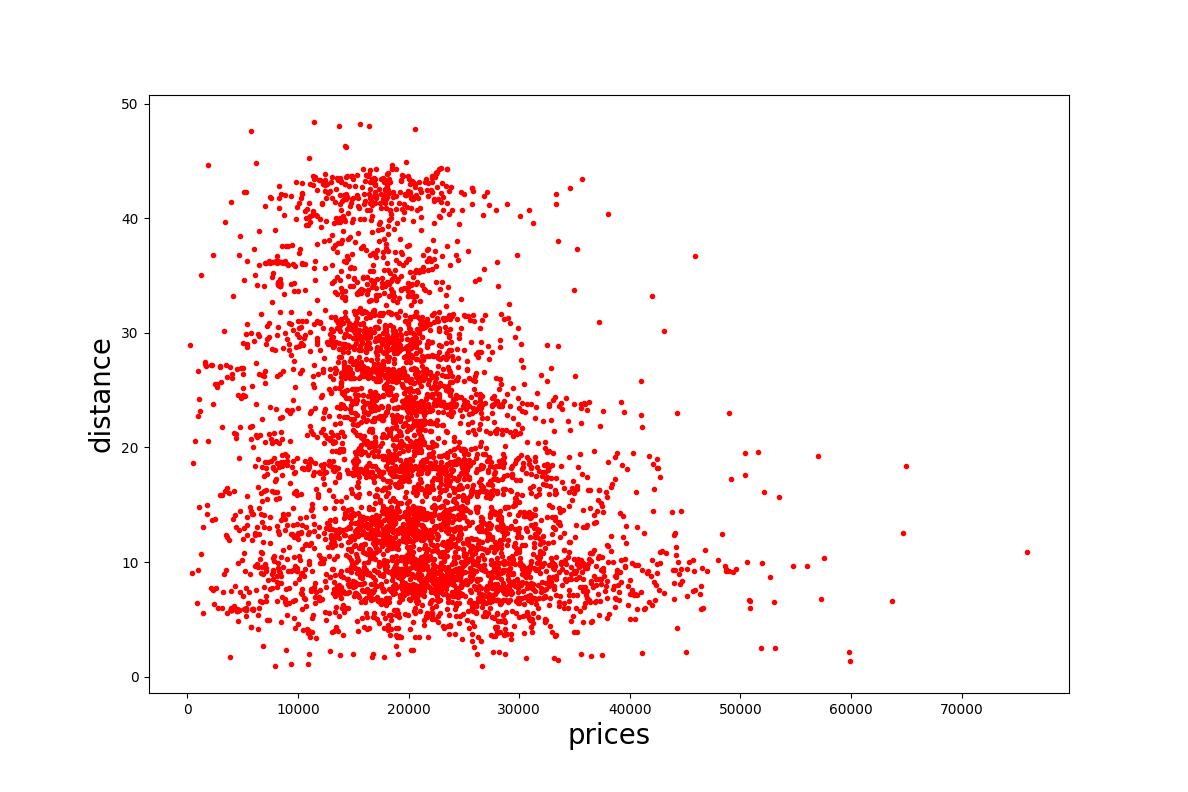

In [31]:
# for this illustration we have used scatterplot
%matplotlib notebook
plt.figure(figsize=(12,8))
plt.xlabel('prices' ,fontsize='20')
plt.ylabel('distance' ,fontsize='20')
plt.scatter( query['price_per_sqm'], nørreport,  color='red', marker='.')
plt.show()

#### Our hypothesis for the relationships between distance from center and prices is that there exists a strong correlation between location and prices. We tend to believe that the houseprices are higher when they are located near city center. The scatterplot however illustrates that our hypothesis has some correct predictions as the highest concentration of the dots are placed within 10-15 km. But the visualizationplot shows that even for 20-30 km away from center, the house prices are still close to the prices in center.    

### 4. Create a histogram (bar plot), which visualizes the frequency of house trades per zip code area corresponding to the entire dataset of housing sale records.

#### Making a frequency of trades per zip code can be done with help of counter library

In [32]:
from collections import Counter

freqzip = dict(Counter(df.zip_nr))

In [33]:
key = []
val = []
for a, b in freqzip.items():
    key.append(a)
    val.append(b)

<IPython.core.display.Javascript object>


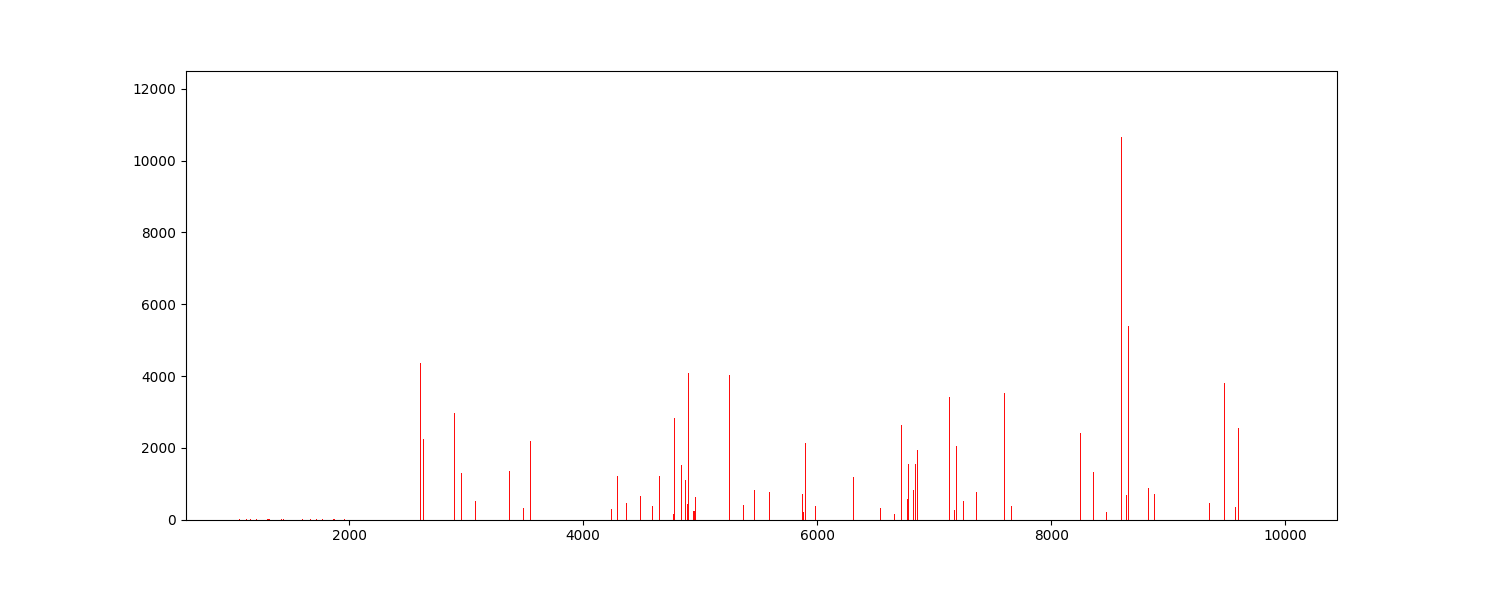

In [34]:
import pylab as P

plt.figure(figsize=(15,6))

plt.bar(key, val, color='red', alpha=0.95)

plt.show()

<IPython.core.display.Javascript object>


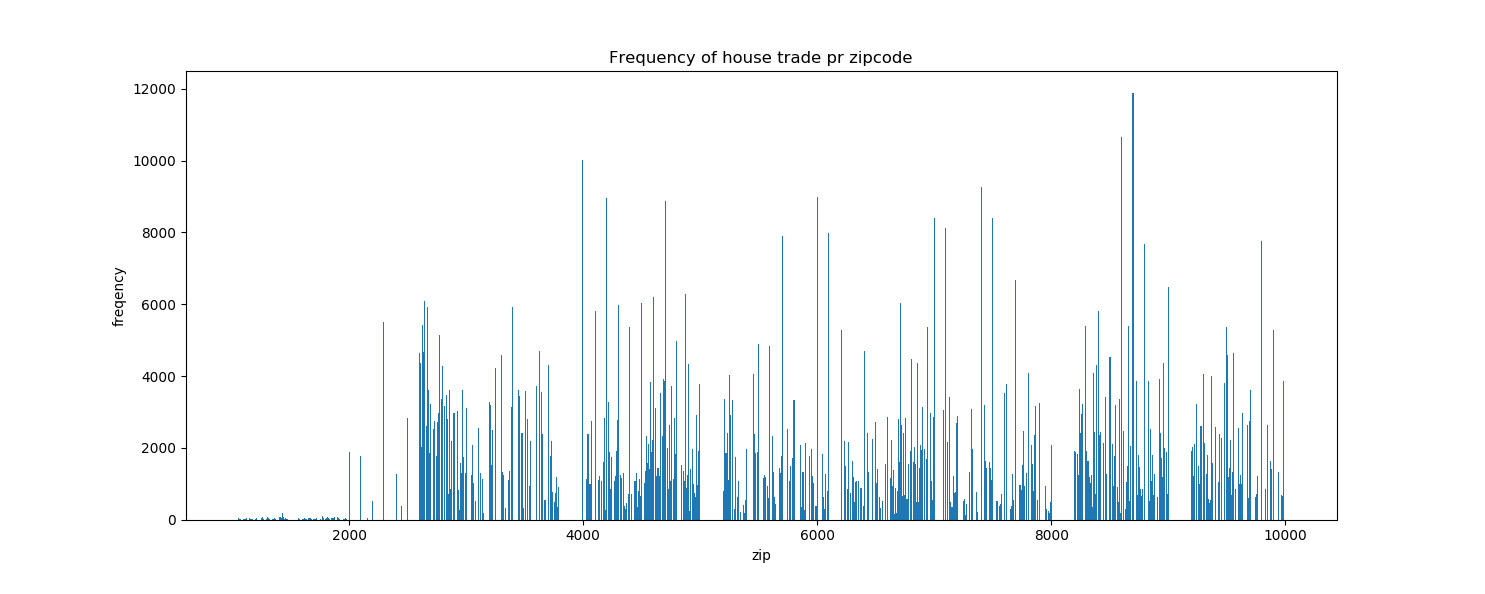

In [35]:
%matplotlib notebook

plt.figure(figsize=(15,6))
plt.title("Frequency of house trade pr zipcode")

plt.xlabel('zip') 
plt.ylabel('freqency')
plt.hist(df['zip_nr'], bins=1000, rwidth=1.0) 
plt.show()

In [36]:
# the zip area with highest frequency is
df.zip_nr.value_counts().idxmax()

8700

In [37]:
# The sorted order can be seen here. From the highest and down
df.zip_nr.value_counts()

8700    11890
8600    10657
4000    10027
7400     9267
6000     8986
4200     8964
4700     8872
7500     8404
7000     8395
7100     8111
5700     7909
9800     7747
8800     7684
7700     6667
6100     6568
9000     6467
4600     6191
2650     6086
4500     6026
2670     5921
3400     5917
8400     5821
4100     5813
4300     5794
2300     5506
8300     5399
8660     5385
6950     5368
4400     5359
9900     5283
        ...  
1921        1
1608        1
1166        1
1103        1
1172        1
1419        1
1652        1
1600        1
1616        1
1160        1
1618        1
1823        1
1819        1
1156        1
1664        1
1436        1
1953        1
1072        1
1704        1
1958        1
1070        1
1350        1
1965        1
1623        1
1061        1
1202        1
1667        1
1356        1
1053        1
1906        1
Name: zip_nr, Length: 912, dtype: int64

In [38]:
#grprice = df.groupby(['zip_nr'], as_index=False)[['price']].agg('sum')
#gr.get_group(9990)

### 5. Create a cumulatve histogram, which visualizes the frequency of house trades per zip code area corresponding to the entire dataset of housing sale records and the vertical bars are colored to the frequency of rooms per sales record. That is, a plot similar to the following, where single rooms are in the bottom and two room frequencies on top, etc. See, http://matplotlib.org/1.3.0/examples/pylab\_examples/histogram\_demo\_extended.html for example.

In [39]:
import operator
max(df.price.items(), key=operator.itemgetter(1))

(390476, 79237000)

In [40]:
#df[df['price']==79237000]

<IPython.core.display.Javascript object>


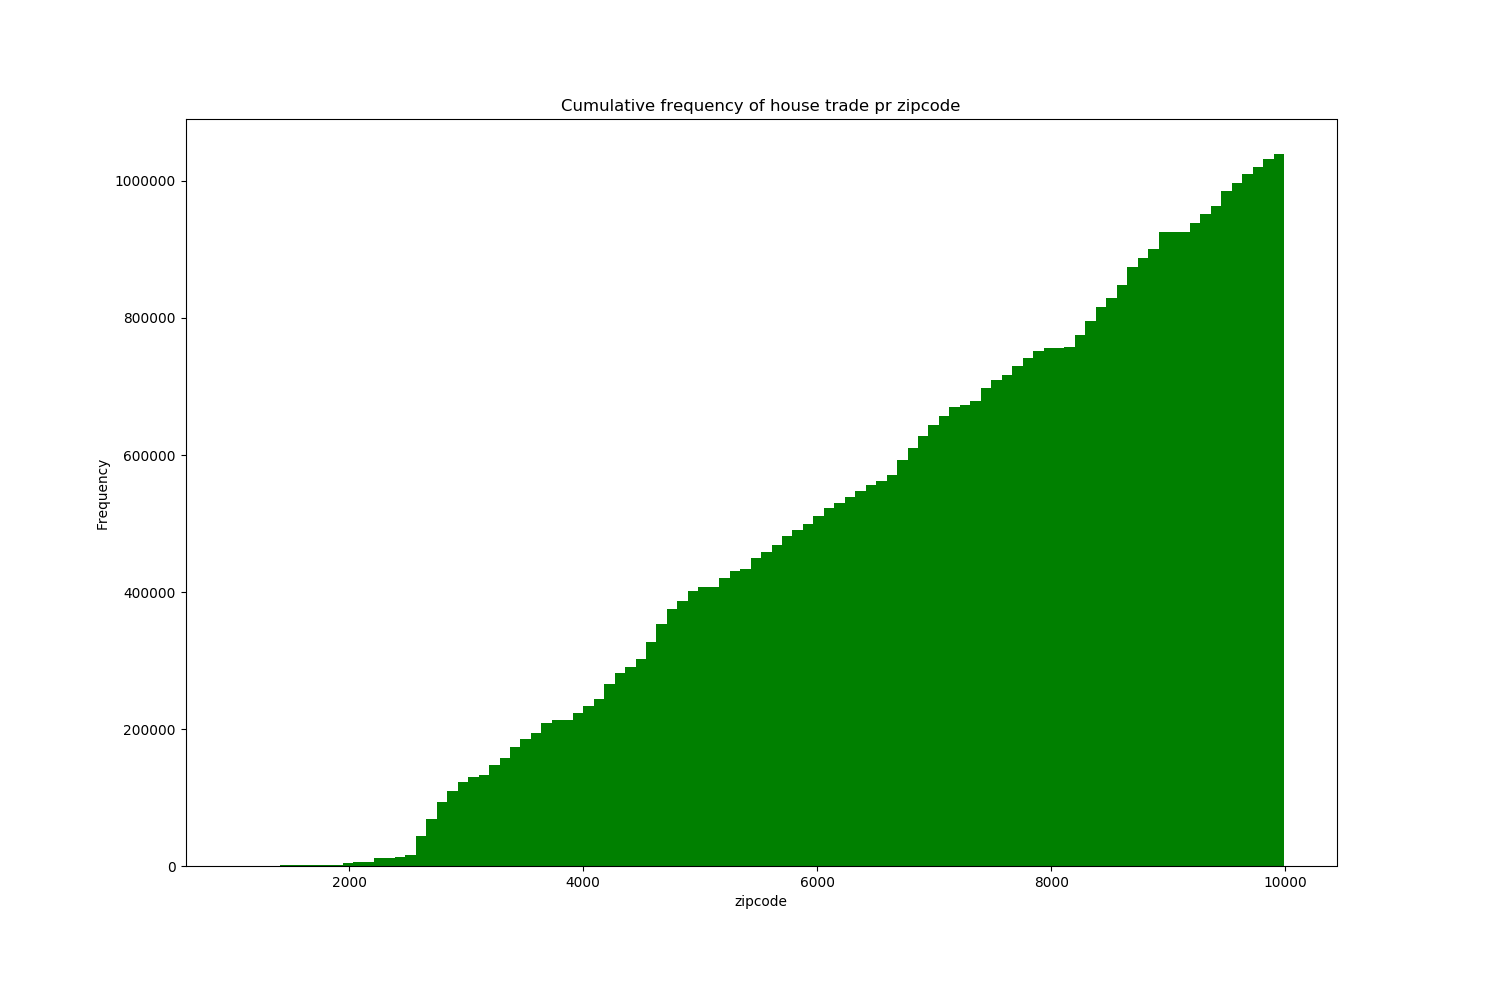

In [41]:
%matplotlib notebook

plt.figure(figsize=(15,10))
plt.title("Cumulative frequency of house trade pr zipcode")
plt.xlabel('zipcode') 
plt.ylabel('Frequency')

plt.hist(df.zip_nr, bins=100,cumulative=True, color ='g')

plt.show()

In [42]:
df['no_rooms'] = df.no_rooms.astype(int)

In [43]:
#groupby zip number 
gr = df.groupby(['zip_nr'],as_index=False)

In [44]:
gr.get_group(1050)

,Unnamed: 0,address,zip_code,price,sell_date,sell_type,price_per_sqm,no_rooms,housing_type,size_in_sqm,year_of_construction,price_change_in_pct,latitude,longitude,zip_nr,sell_year,dist_from_cph_center
2340,2340,"Kongens Nytorv 19, 4",1050 København K,4700000,2014-11-04,Alm. Salg,37301.0,3,Lejlighed,126.0,1767.0,0.0,55.679827,12.584793,1050,2014,1.874172
5614,5614,"Kongens Nytorv 21, 3. TV",1050 København K,6250000,1999-09-11,Alm. Salg,22321.0,7,Lejlighed,280.0,1767.0,0.0,55.679963,12.584776,1050,1999,1.875561


In [45]:
dicts = {}
key = []
coroom = []
for a,b in gr:
    newg = b.groupby('no_rooms')
    for x,y in newg:
        t = x,y.no_rooms.count()    
        key.append(a)
        coroom.append(t)
        
dicts = {"id":key, "rooms":coroom}
newdf = pd.DataFrame(dicts)

In [46]:
# save to csv file
#newdf.to_csv('rooms.csv')

In [47]:
newrooms = pd.read_csv('rooms.csv')

In [48]:
newrooms.head()

,Unnamed: 0,id,rooms
0,0,1050,"(3, 1)"
1,1,1050,"(7, 1)"
2,2,1051,"(1, 4)"
3,3,1051,"(2, 7)"
4,4,1051,"(3, 8)"


In [49]:
def makebar(ids,roomlist):
    arr=[]
    r = str(roomlist.rooms.values)
    rest = r.split('dtype=object')
    rest = str(rest)
    rest = rest.replace('[\"',' ')
    rest = rest.replace('\"]',' ')
    rest = rest.replace('\")',' ')
    rest = rest.replace('(',' ')
    rest = rest.replace(')',' ')
    rest = rest.replace('\\n ',' ')
    rest = rest.replace('\ " ',' ')    
    row = ids,rest
    arr.append(row)
    #print(row)
    return arr
    

In [50]:
idunique = newrooms.id.unique()
createbar = []
for ids in idunique:
    createbar.append(makebar(ids,newrooms[newrooms['id']==ids]))    

In [51]:
newdicts = {"zip":createbar}
bardf = pd.DataFrame(newdicts)

In [52]:
bardf

,zip
0,"[(1050, [' 3, 1 ' ' 7, 1 '] )]"
1,"[(1051, [' 1, 4 ' ' 2, 7 ' ' 3, 8 ' ' 4, 5 ' ..."
2,"[(1052, [' 4, 1 ' ' 7, 1 '] )]"
3,"[(1053, [' 5, 1 '] )]"
4,"[(1054, [' 3, 2 ' ' 4, 3 ' ' 6, 1 '] )]"
5,"[(1055, [' 1, 1 ' ' 2, 2 ' ' 4, 2 '] )]"
6,"[(1057, [' 2, 1 ' ' 3, 1 ' ' 7, 1 '] )]"
7,"[(1058, [' 2, 2 ' ' 4, 2 '] )]"
8,"[(1061, [' 13, 1 '] )]"
9,"[(1062, [' 4, 2 ' ' 5, 1 '] )]"


In [57]:
ziparray = []
roomsarray = []
actual = []
roomcount = []

for a in bardf.zip.values:    
    for i in a:               
        part = i[1]
        part = part.replace('\'','+')
        part = part.replace('+ +',':')
        part = part.replace('+',' ')
        part = part.replace('[\'',' ')
        part = part.replace('\']',' ')
        ziparray.append(i[0]) 
        roomsarray.append(part)
        

<IPython.core.display.Javascript object>


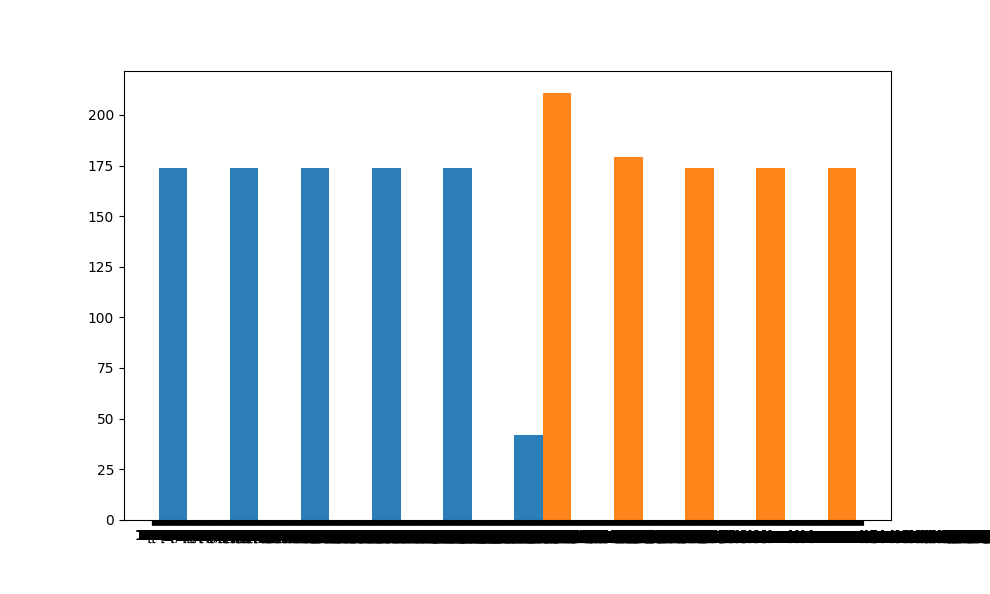

In [55]:
%matplotlib notebook

plt.figure(figsize=(10,6))

plt.hist([ziparray,roomsarray], alpha=0.95)

plt.show()

<IPython.core.display.Javascript object>


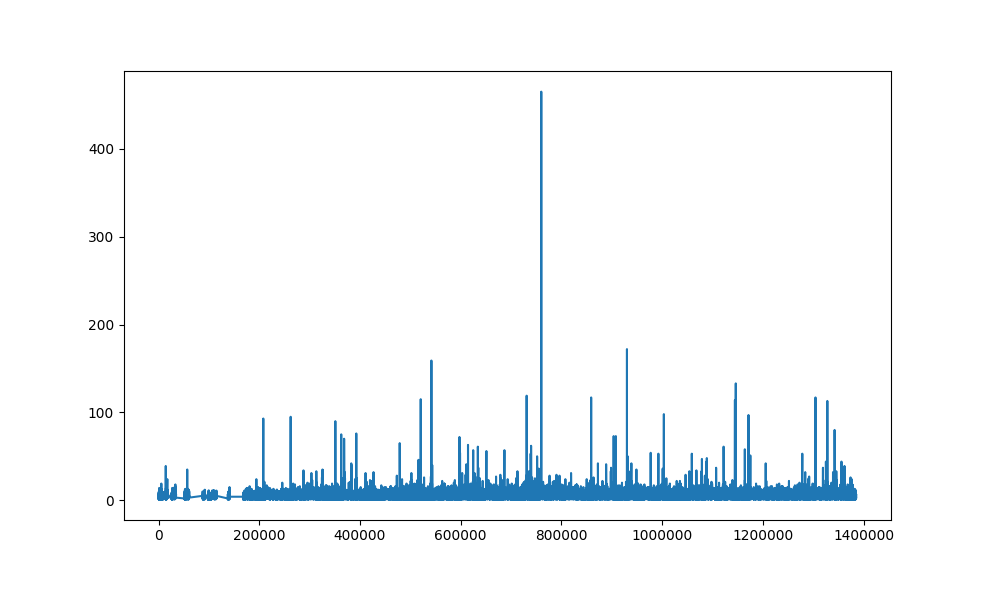

In [56]:
%matplotlib notebook

plt.figure(figsize=(10,6))

df['no_rooms'].plot()
plt.show()

### 6. Now, you create a 3D histogram, in which you plot the frequency of house trades per zip code area as a 'layer' for every in the dataset, see http://matplotlib.org/examples/mplot3d/index.html for an example.

#### This 3D histogram is showing frequency of zip code

<IPython.core.display.Javascript object>


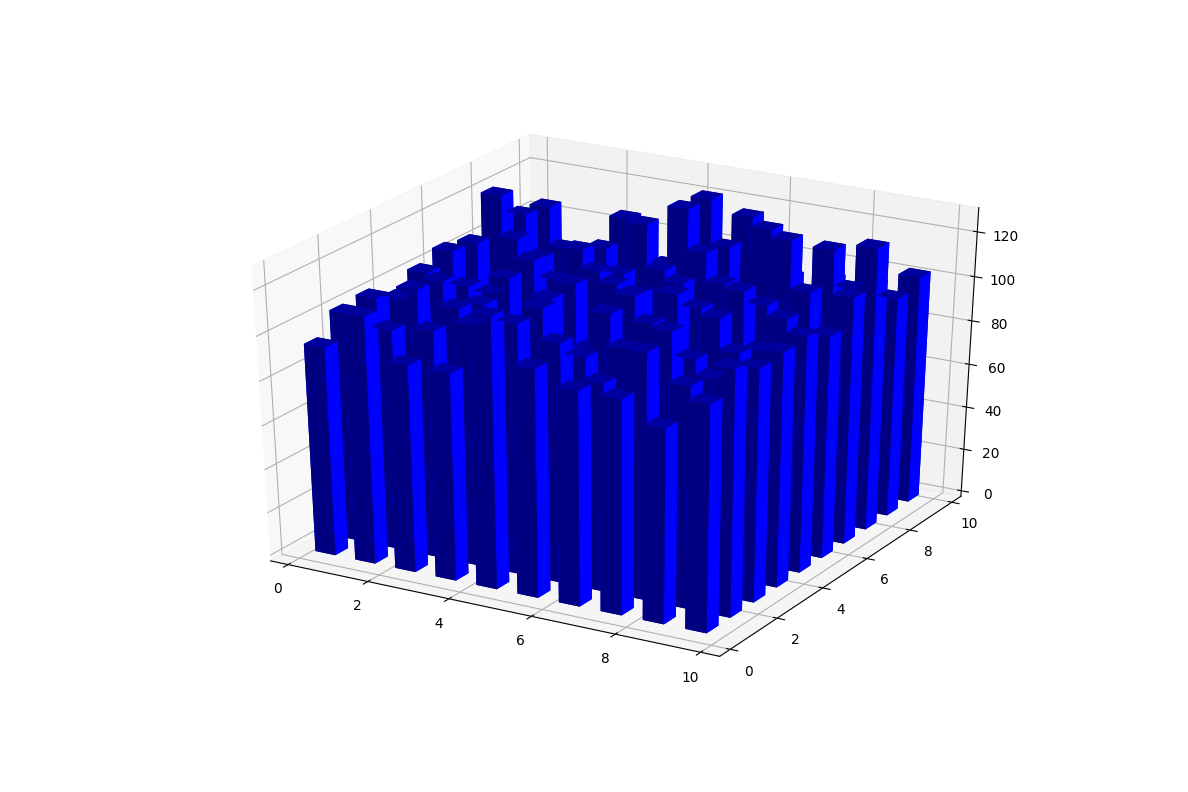

In [58]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
x,y = np.random.rand(2,df.zip_nr.count())*100

hist, xedges, yedges = np.histogram2d(x,y, bins=10, range=[[0, 10], [0, 10]])

xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25)
xpos = xpos.flatten('F')
ypos = ypos.flatten('F')
zpos = np.zeros_like(xpos)

dx = 0.5 * np.ones_like(zpos)
dy = dx.copy()
dz = hist.flatten()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='b', zsort='average')

plt.show()

### 7. Freestyle Create a plot, which visualizes a fact hidden in the housing sales data, which you want to highlight to business people.


<IPython.core.display.Javascript object>


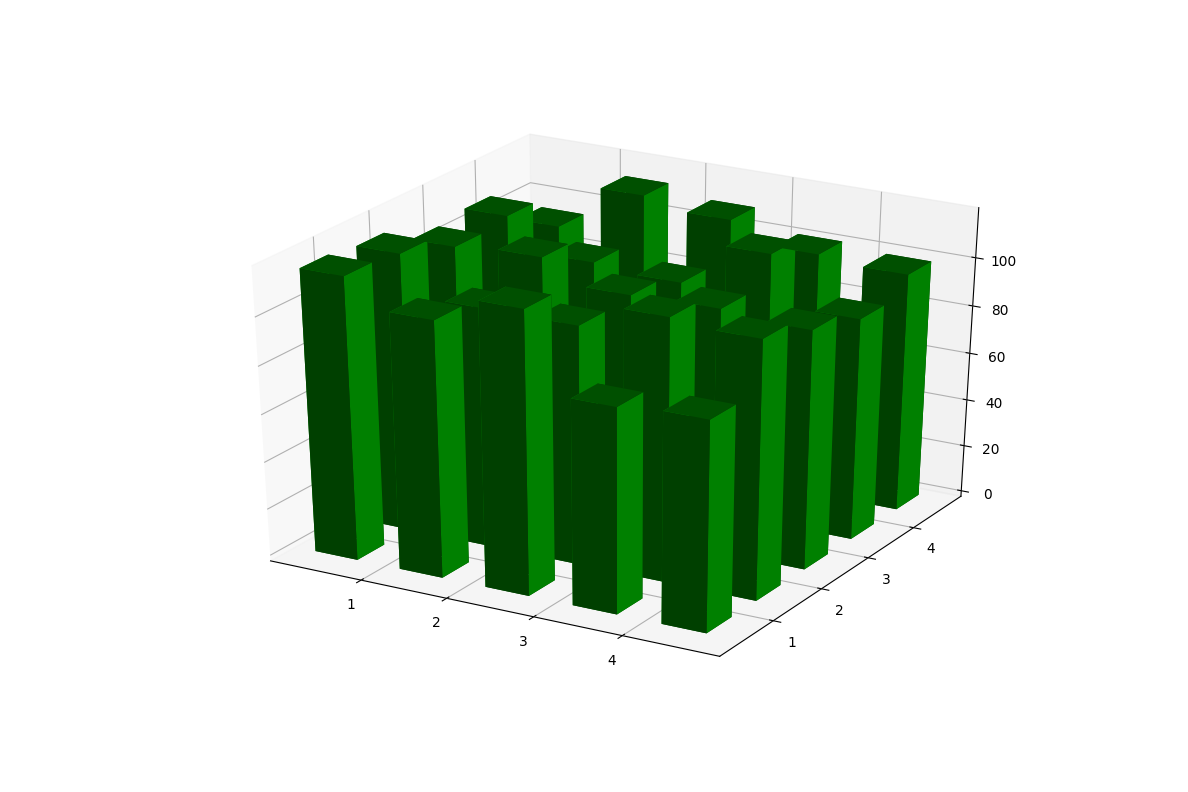

In [59]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
x,y = np.random.rand(2,df.price_per_sqm.count())*100

hist, xedges, yedges = np.histogram2d(x,y, bins=5, range=[[0, 5], [0, 5]])

xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25)
xpos = xpos.flatten('F')
ypos = ypos.flatten('F')
zpos = np.zeros_like(xpos)

dx = 0.5 * np.ones_like(zpos)
dy = dx.copy()
dz = hist.flatten()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='g', zsort='average')

plt.show()

<IPython.core.display.Javascript object>


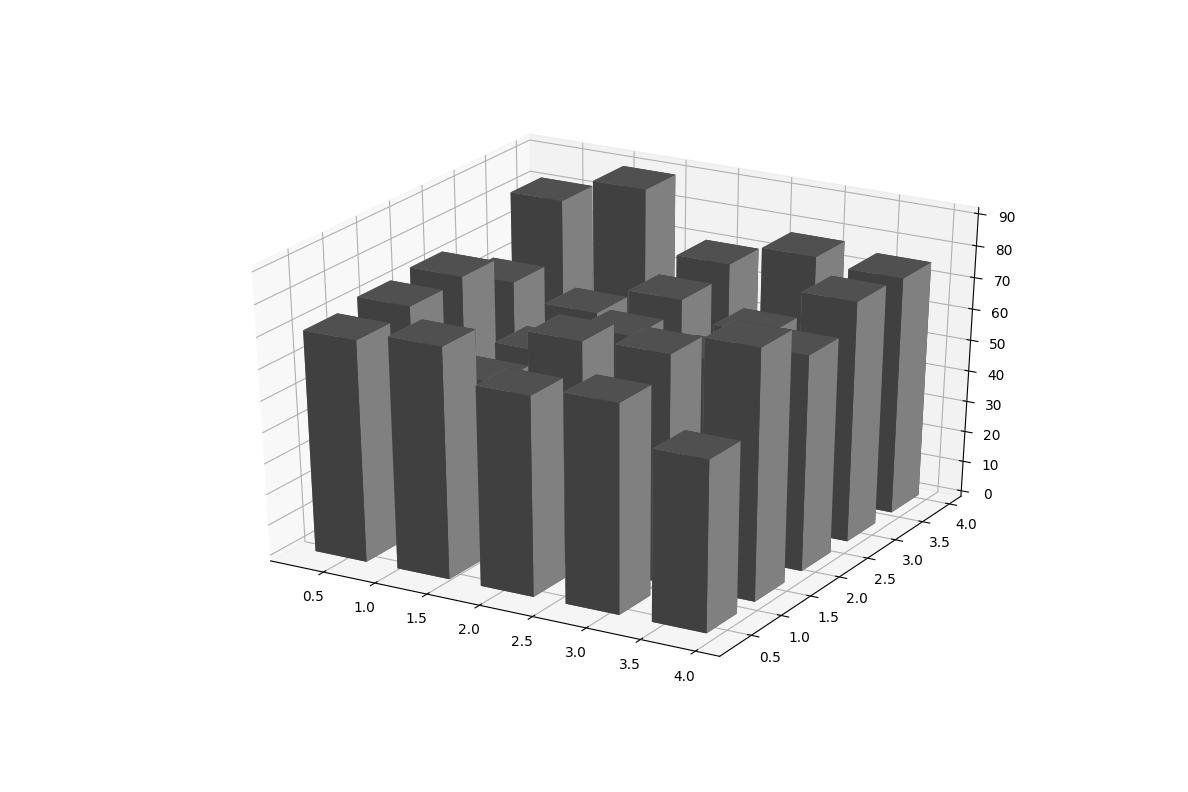

In [60]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
x,y = np.random.rand(2,df.price.count())*100

hist, xedges, yedges = np.histogram2d(x,y, bins=5, range=[[0, 4], [0, 4]])

xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25)
xpos = xpos.flatten('F')
ypos = ypos.flatten('F')
zpos = np.zeros_like(xpos)

dx = 0.5 * np.ones_like(zpos)
dy = dx.copy()
dz = hist.flatten()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='grey', zsort='average')

plt.show()